In [51]:
import pandas as pd
import numpy as np

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
df=pd.read_csv('/content/drive/MyDrive/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df.shape


(891, 12)

In [55]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
col_to_drop=["PassengerId","Name","Ticket","Cabin"]
df=df.drop(columns=col_to_drop)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [57]:
df.shape

(891, 8)

In [58]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print(missing_values)


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


##replace age with median and embarked with mode

In [59]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)

In [60]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [63]:
# Replace 'male' with 1 and 'female' with 0 in the 'Sex' column
df['Sex'] = df['Sex'].replace({'male': 1, 'female': 0})

# Define a mapping for 'Embarked' values
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}

# Replace 'Embarked' values using the mapping
df['Embarked'] = df['Embarked'].map(embarked_mapping)

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


scale the features

In [65]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Columns to be scaled
features_to_scale = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Create scaler objects
minmax_scaler = MinMaxScaler()
standardscaler = StandardScaler()

# Apply Min-Max scaling
df[features_to_scale] = minmax_scaler.fit_transform(df[features_to_scale])

# Apply Standardization
df[features_to_scale] = standardscaler.fit_transform(df[features_to_scale])

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445,-0.568837
1,1,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845,1.005181
2,1,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854,-0.568837
3,1,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730,-0.568837
4,0,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337,-0.568837


split the data

In [67]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Survived"])  # Features
y = df["Survived"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature importance

In [69]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [70]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8212290502793296
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



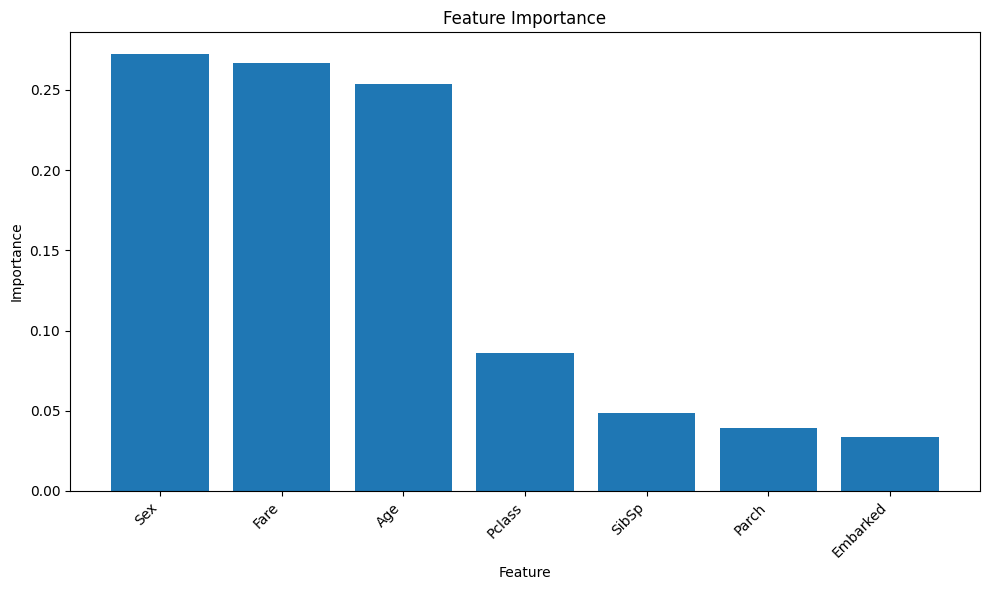

In [71]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = clf.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame to associate features with their importances
importances_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})

# Sort the features by importance in descending order
importances_df = importances_df.sort_values(by="Importance", ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(importances_df["Feature"], importances_df["Importance"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


In [72]:
import xgboost as xgb

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)




In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8156424581005587
Precision: 0.7887323943661971
Recall: 0.7567567567567568
F1-Score: 0.7724137931034482
Confusion Matrix:
 [[90 15]
 [18 56]]


In [77]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Create a CatBoost model
catboost_model = CatBoostClassifier(iterations=1000, random_seed=42, verbose=False)

# Fit the model to the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_catboost = catboost_model.predict(X_test)

# Calculate accuracy
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)

# Print accuracy
print("Accuracy (CatBoost):", accuracy_catboost)


Accuracy (CatBoost): 0.8100558659217877


In [75]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.1 MB/s eta 0:00:00
